In [58]:
# Import

import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 

from utils.eda_utils import df_overview

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 500)
np.set_printoptions(precision=4, suppress=True)
pd.set_option("display.width", 100)

# Modeling needs
from sklearn.metrics import r2_score 
from sklearn.model_selection import  train_test_split 
from sklearn.linear_model import LinearRegression

In [59]:
# Read the data

file = (r"ABS_Family_and_community_by_2021_SA2_Nov_2023_-6178891546057005013.csv")

df = pd.read_csv(file)
df.shape

(2473, 103)

In [60]:
df.sample(2)

,OBJECTID,Statistical Areas Level 2 2021 code,Statistical Areas Level 2 2021 name,Area in square kilometres,Uniform Resource Identifier,Used one method of travel to work: Train (no.) (Data year: 2021),Used one method of travel to work: Tram (no.) (Data year: 2021),Used one method of travel to work: Bus (no.) (Data year: 2021),Used one method of travel to work: Ferry (no.) (Data year: 2021),Used one method of travel to work: Car (as driver) (no.) (Data year: 2021),Used one method of travel to work: Car (as passenger) (no.) (Data year: 2021),Used one method of travel to work: Taxi or ride-share service (no.) (Data year: 2021),Used one method of travel to work: Truck (no.) (Data year: 2021),Used one method of travel to work: Motor bike/scooter (no.) (Data year: 2021),Used one method of travel to work: Bicycle (no.) (Data year: 2021),Used one method of travel to work: Other (no.) (Data year: 2021),Used one method of travel to work: Walked only (no.) (Data year: 2021),Used one method of travel to work: Total persons (no.) (Data year: 2021),Used more than one method of travel to work: Total persons (no.) (Data year: 2021),"People who travelled to work using at least one form of public transport (train, tram, bus, ferry) (no.) (Data year: 2021)",People who travelled to work by car (as a driver or passenger) as at least one of their methods of travel (no.) (Data year: 2021),People who worked from home (no.) (Data year: 2021),People who were employed but did not go to work (no.) (Data year: 2021),Method of travel to work not stated (no.) (Data year: 2021),Total persons employed aged 15 years and over (no.) (Data year: 2021),Lone person households (no.) (Data year: 2021),Group households (no.) (Data year: 2021),Family households (no.) (Data year: 2021),Total households (no.) (Data year: 2021),Average household size (no. of persons) (Data year: 2021),Couple families with children under 15 and/or dependent students (no.) (Data year: 2021),Couple families with non-dependent children only (no.) (Data year: 2021),Couple families without children (no.) (Data year: 2021),One parent families with children under 15 and/or dependent students (no.) (Data year: 2021),One parent families with non-dependent children only (no.) (Data year: 2021),Other families (no.) (Data year: 2021),Total families (no.) (Data year: 2021),Average family size (no. of persons) (Data year: 2021),Social marital status: Married in a registered marriage (no.) (Data year: 2021),Social marital status: Married in a de facto marriage (no.) (Data year: 2021),Social marital status: Not married (no.) (Data year: 2021),Registered marital status: Married (%) (Data year: 2021),Registered marital status: Never married (%) (Data year: 2021),Registered marital status: Widowed (%) (Data year: 2021),Registered marital status: Divorced (%) (Data year: 2021),Registered marital status: Separated (%) (Data year: 2021),Internet accessed from private dwelling (%) (Data year: 2016),Internet not accessed from private dwelling (%) (Data year: 2016),Access to internet at home inadequately described or not stated (%) (Data year: 2016),Median weekly household rental payment ($) (Data year: 2021),Median monthly household mortgage payment ($) (Data year: 2021),Persons who did not provide child care (%) (Data year: 2021),Persons who cared for own child/children (%) (Data year: 2021),Persons who cared for other child/children (%) (Data year: 2021),Persons who cared for own or other child/children (%) (Data year: 2021),Unpaid child care not stated (%) (Data year: 2021),Persons who provided unpaid assistance to a person with a disability (%) (Data year: 2021),Persons undertaking voluntary work for an organisation or group (%) (Data year: 2021),Average number of children per family (for families with children) (no.) (Data year: 2021),Housing suitability: Dwellings with extra bedrooms needed (no.) (Data year: 2021),Housing suitability: Dwellings with bedrooms spare (no.) (Data year: 2021),Housing suitability

In [61]:
# Delete the rows without any data
df_filtered = df.dropna(how='all').copy()

df_filtered = df_filtered[df_filtered['OBJECTID'].notna()]
df_filtered = df_filtered[df_filtered['Area in square kilometres'].notna()]


df_filtered = df_filtered[["Statistical Areas Level 2 2021 code","Statistical Areas Level 2 2021 name","Area in square kilometres",
             "Persons who cared for own or other child/children (%) (Data year: 2021)",
             "Persons undertaking voluntary work for an organisation or group (%) (Data year: 2021)",
             "Persons who provided unpaid assistance to a person with a disability (%) (Data year: 2021)",
             "Access to internet at home inadequately described or not stated (%) (Data year: 2016)",
            "Lone person households (no.) (Data year: 2021)","Group households (no.) (Data year: 2021)","Family households (no.) (Data year: 2021)",
            "Total households (no.) (Data year: 2021)","Average household size (no. of persons) (Data year: 2021)"]]


Text(0, 0.5, 'Total no of households')

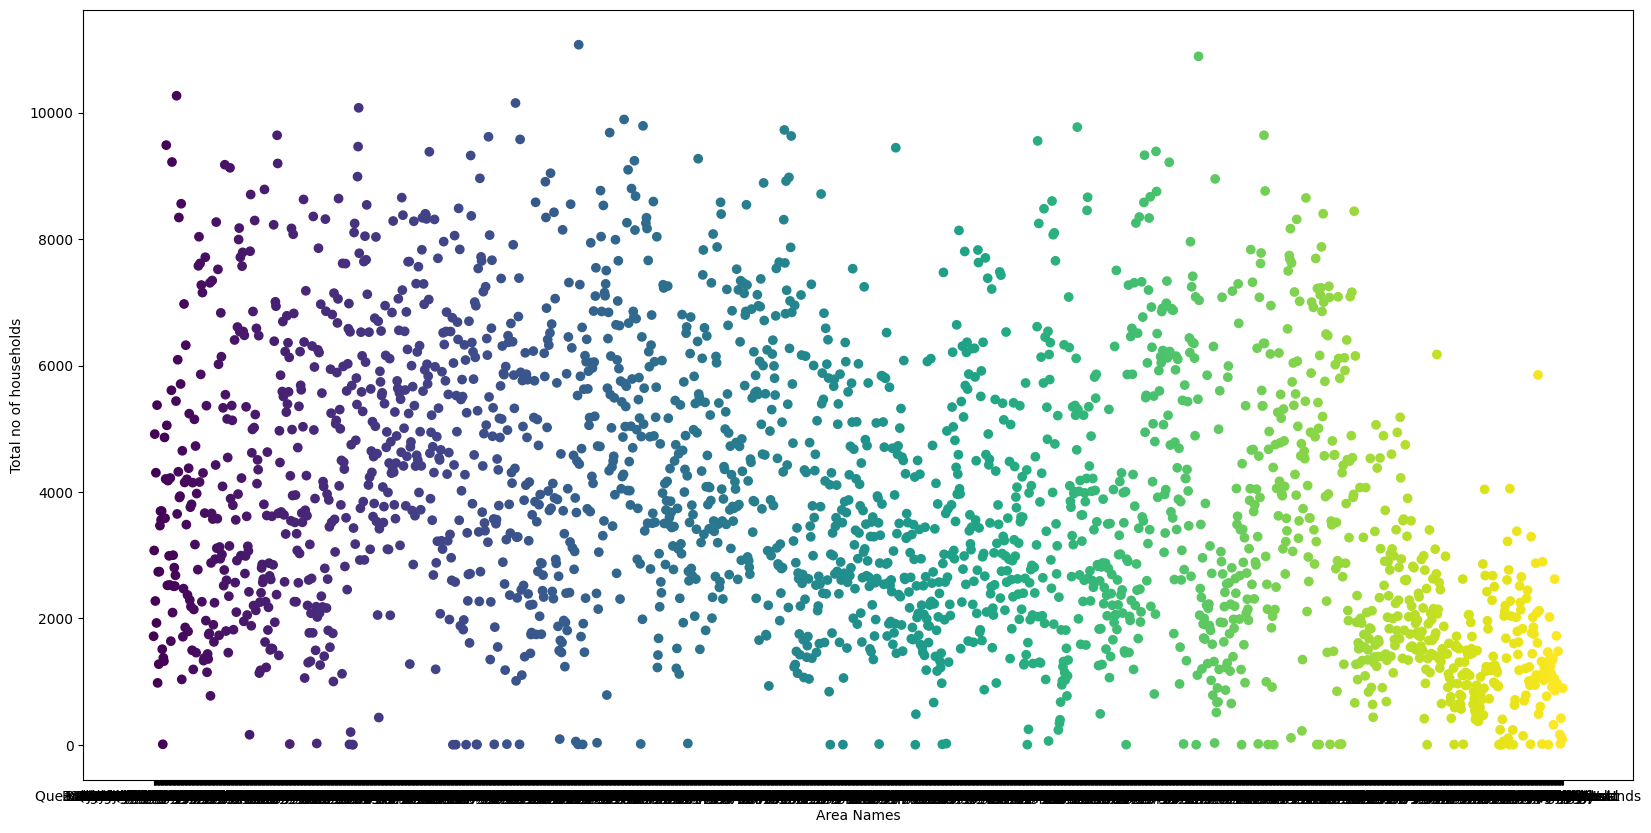

In [62]:
xdata = df_filtered["Statistical Areas Level 2 2021 name"]  # Setting the x values
ydata = df_filtered["Total households (no.) (Data year: 2021)"] 
t = np.arange(2454)

 # setting the y values
plt.figure(figsize = (20,10)) # set the size of the figure
plt.scatter(xdata, ydata, c=t) # scatter plot of the data
plt.xlabel("Area Names")
plt.ylabel("Total no of households")

In [63]:
df_filtered = df_filtered[
    (df_filtered["Area in square kilometres"] < 6000)
]

[Text(0.5, 0, 'Group'),
 Text(0, 0.5, 'Area in sqKm'),
 Text(0.5, 1.0, 'Box Plot On Area Across Group')]

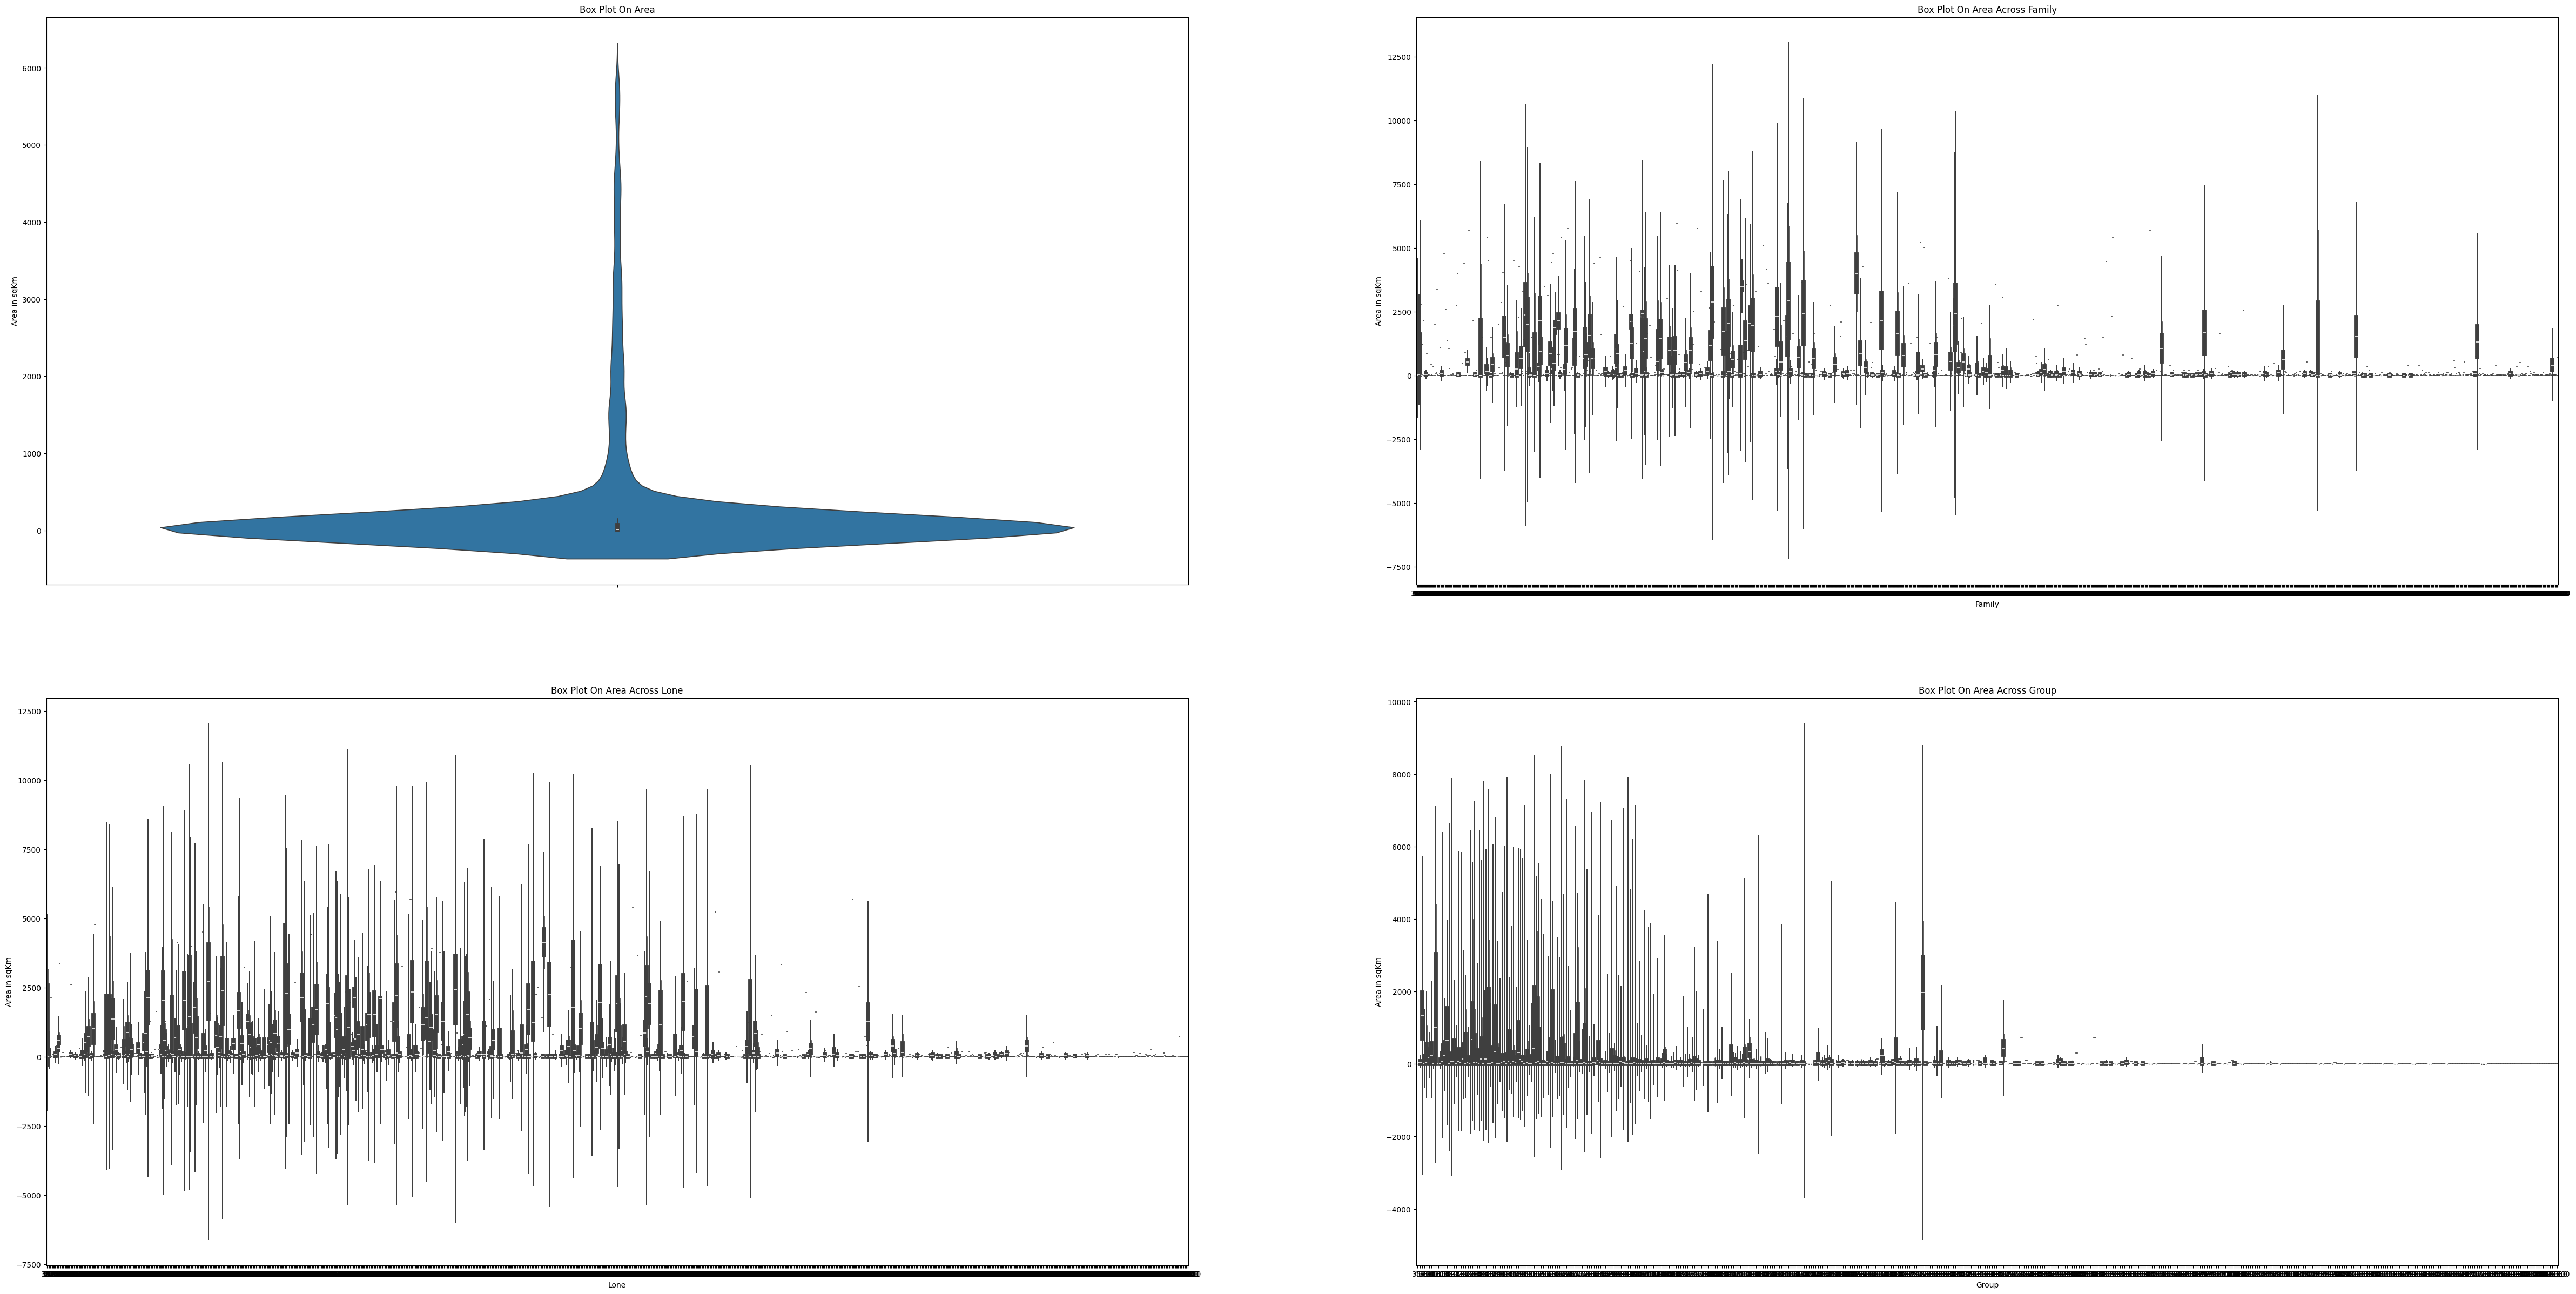

In [65]:
# explore categorical features
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(60, 30)
sns.violinplot(data=df_filtered,y="Area in square kilometres",orient="v",ax=axes[0][0])
sns.violinplot(data=df_filtered,y="Area in square kilometres",x="Family households (no.) (Data year: 2021)",orient="v",ax=axes[0][1])
sns.violinplot(data=df_filtered,y="Area in square kilometres",x="Lone person households (no.) (Data year: 2021)",orient="v",ax=axes[1][0])
sns.violinplot(data=df_filtered,y="Area in square kilometres",x="Group households (no.) (Data year: 2021)",orient="v",ax=axes[1][1])


axes[0][0].set(ylabel='Area in sqKm',title="Box Plot On Area")
axes[0][1].set(xlabel='Family', ylabel='Area in sqKm',title="Box Plot On Area Across Family")
axes[1][0].set(xlabel='Lone', ylabel='Area in sqKm',title="Box Plot On Area Across Lone")
axes[1][1].set(xlabel='Group', ylabel='Area in sqKm',title="Box Plot On Area Across Group")